<a href="https://colab.research.google.com/github/IvanFP26/MachineLearning/blob/main/Week8/SVM_BigMartSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Nama : Ivan Fernanda Prayoga
#NIM : 1103204035
#SVM on Big Mart Sales Dataset

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd

# Ganti 'nama_file.csv' dengan nama file dataset Anda
nama_file = '/content/gdrive/MyDrive/Machine Learning/Big_Mart_Sales.csv'

# Membaca dataset menjadi DataFrame
df = pd.read_csv(nama_file)

# Menampilkan beberapa baris pertama dari DataFrame
df

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.dropna(subset=['Weight', 'MRP', 'EstablishmentYear'], inplace=True)

Contoh untuk Klasifikasi (SVM - SVC):

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Pisahkan fitur dan target
X = df[['Weight', 'MRP']]  # Pastikan nama kolom sesuai dengan dataset Anda
y = df['EstablishmentYear']  # Ganti dengan kolom label yang sesuai

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat dan melatih model SVM untuk klasifikasi
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test_scaled)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')  # Menampilkan akurasi dengan angka desimal penuh

Accuracy: 0.1254


Contoh untuk Regresi (SVM - SVR):

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Pisahkan fitur dan target
X = df[['Weight', 'MRP']]  # Pastikan nama kolom sesuai dengan dataset Anda
y = df['EstablishmentYear']  # Ganti dengan kolom label yang sesuai

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat dan melatih model SVM untuk regresi
model = SVR(kernel='linear')
model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test_scaled)

# Evaluasi menggunakan mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 46.501006915639834


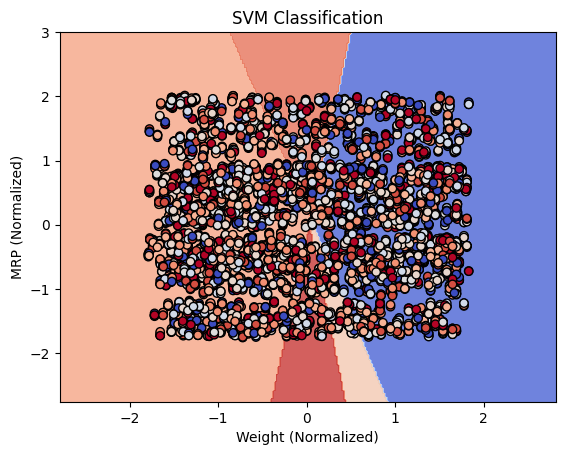

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur dan target
X = df[['Weight', 'MRP']]  # Pastikan nama kolom sesuai dengan dataset Anda
y = df['EstablishmentYear']  # Ganti dengan kolom label yang sesuai

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membuat dan melatih model SVM untuk klasifikasi
model = SVC(kernel='linear')
model.fit(X_scaled, y)

# Membuat meshgrid untuk plotting
h = .02  # Ukuran langkah pada mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Prediksi kelas pada setiap titik pada meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape hasil untuk plotting
Z = Z.reshape(xx.shape)

# Plot hasil
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
plt.title('SVM Classification')
plt.xlabel('Weight (Normalized)')
plt.ylabel('MRP (Normalized)')

plt.show()